### Importing Libraries

In [1]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re

In [2]:
encodings=['utf-8','latin1','150-8359-1','Cp1252']

file_path = "spam.csv"
for encoding in encodings:
    try:
        data=pd.read_csv(file_path,encoding=encoding)
        print(f"file successfully read with encoding: (encoding)")
        break
    except UnicodeDecodeError:
        print(f"failed to read with encoding : (encoding)")
        continue
        
if "data" in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

failed to read with encoding : (encoding)
file successfully read with encoding: (encoding)
CSV file has been successfully loaded.


In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1574,ham,My sis is catching e show in e afternoon so i'...,NaN,NaN,NaN
510,ham,"8 at the latest, g's still there if you can sc...",NaN,NaN,NaN
3244,ham,"Its ok, if anybody asks abt me, u tel them..:-P",NaN,NaN,NaN
2393,ham,"Okey doke. I'm at home, but not dressed cos la...",NaN,NaN,NaN
3865,ham,"Theoretically yeah, he could be able to come",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Dropping the redundent looking collumns (for this project)
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
# Renaming the columns because I feel fancy today 
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Exploration

Text(0, 0.5, 'Number of Data points')

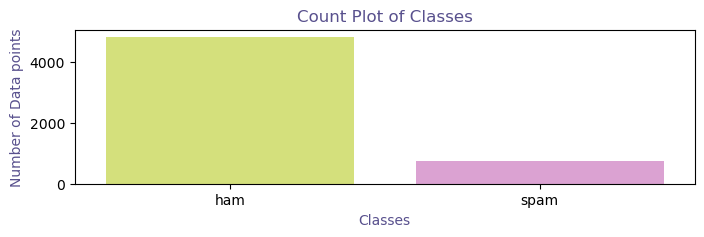

In [6]:
#Palette
cols= ["#E1F16B", "#E598D8"] 
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(8,2))
fg = sns.countplot(x= data["Target"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
data["Target"] = encoder.fit_transform(data["Target"])

In [9]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#missing value
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
#check for duplicate value
data.duplicated().sum()

403

In [12]:
#remove duplicates
data=data.drop_duplicates(keep='first')

In [13]:
data.duplicated().sum()

0

In [14]:
data.shape

(5169, 2)

### Data Visualization

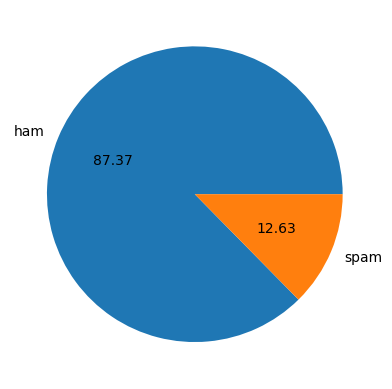

In [15]:
plt.pie(data['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data['num_characters'] = data['Text'].apply(len) # number of characters

In [19]:
data.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# no of words
data['num_words']=data['Text'].apply(lambda x :len(nltk.word_tokenize(x))) #words count

In [21]:
data.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
#number of sentences
data['num_sent']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x))) 

In [23]:
data.head()

,Target,Text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
data[{'num_characters','num_words','num_sent'}].describe()

C:\Users\goyal\AppData\Local\Temp\ipykernel_11556\2573669050.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[{'num_characters','num_words','num_sent'}].describe()


,num_sent,num_characters,num_words
count,5169.000000,5169.000000,5169.000000
mean,1.947185,78.977945,18.453279
std,1.362406,58.236293,13.324793
min,1.000000,2.000000,1.000000
25%,1.000000,36.000000,9.000000
50%,1.000000,60.000000,15.000000
75%,2.000000,117.000000,26.000000
max,28.000000,910.000000,220.000000


<Axes: xlabel='num_characters', ylabel='Count'>

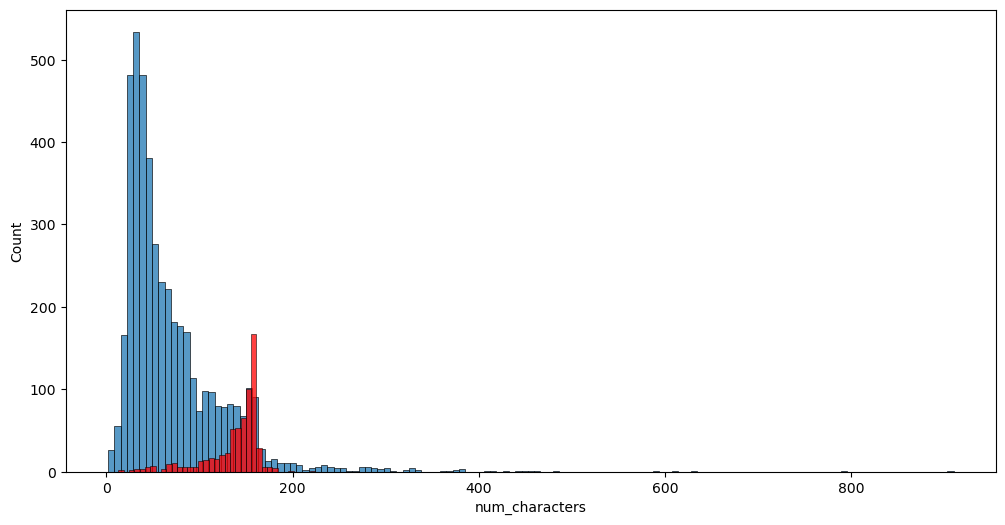

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Target']==0]['num_characters'])
sns.histplot(data[data['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

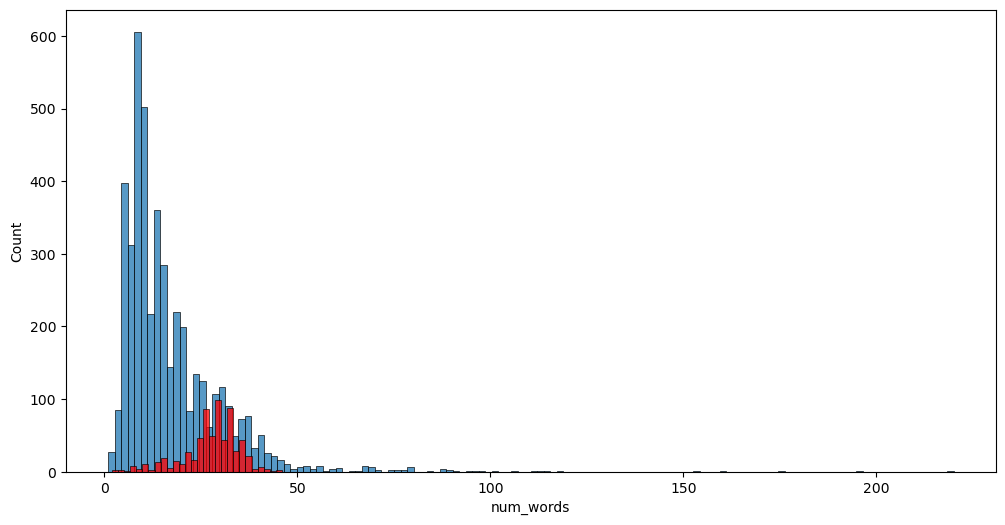

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Target']==0]['num_words'])
sns.histplot(data[data['Target']==1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

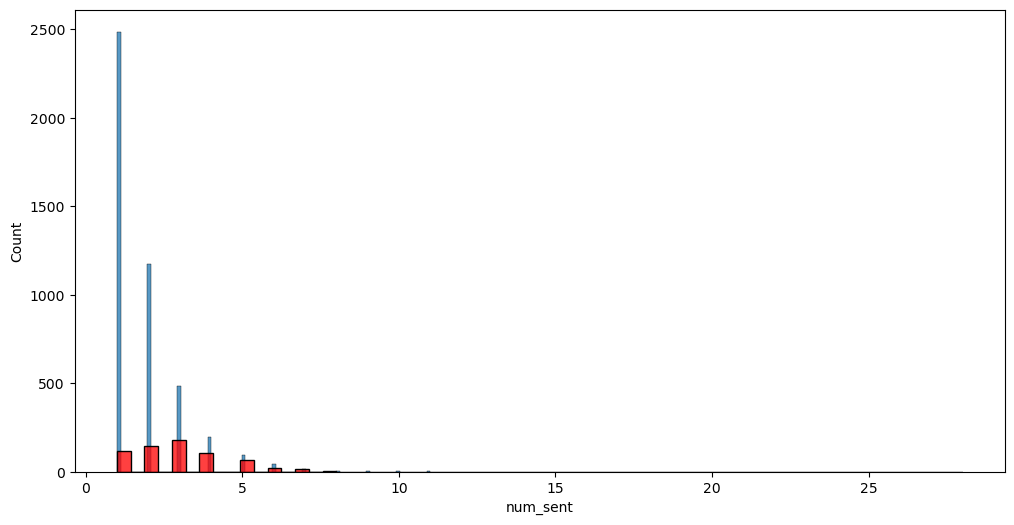

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Target']==0]['num_sent'])
sns.histplot(data[data['Target']==1]['num_sent'],color='red')

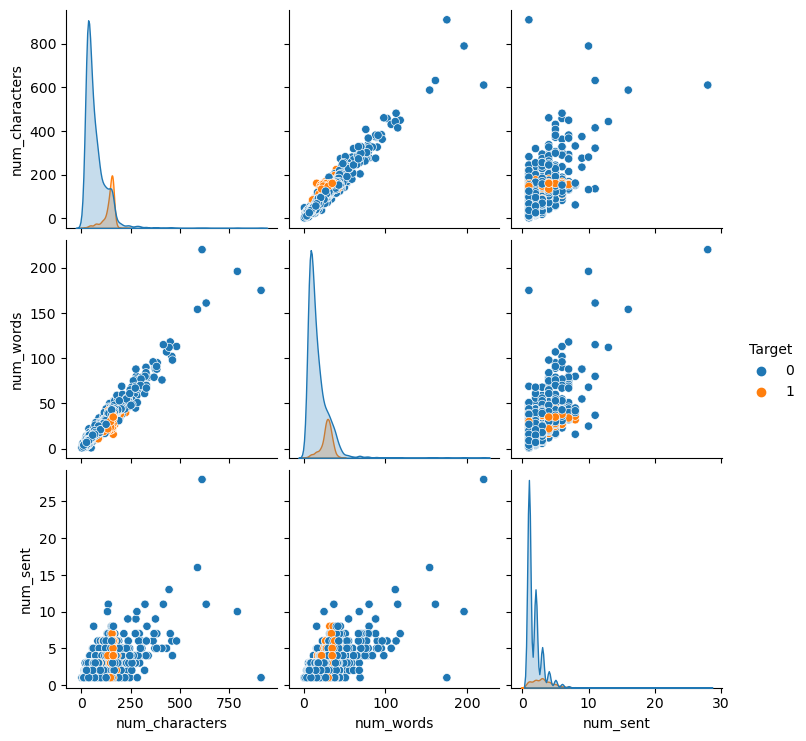

In [28]:
sns.pairplot(data,hue='Target')

C:\Users\goyal\AppData\Local\Temp\ipykernel_11556\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

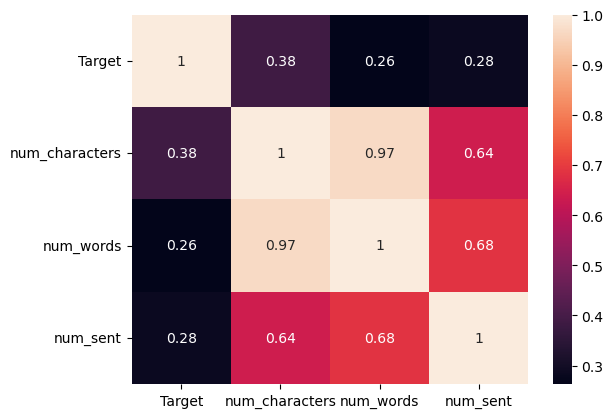

In [29]:
sns.heatmap(data.corr(),annot=True)

### Data Preprocessing

In [30]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [31]:
nltk.download('stopwords') #to remove stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
ps = PorterStemmer()

def transform_text(Text):
    Text = Text.lower()  # Corrected: Added parentheses to call the lower() method
    Text = nltk.word_tokenize(Text)
    
    y = []
   
    for i in Text:
        if i.isalnum():
            y.append(i)
            
    Text = y[:]  # Corrected: Changed Text=y[i] to Text=y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]  # Corrected: Changed Text=y[i] to Text=y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore")
print(transformed_text)

gon na home soon want talk stuff anymor


In [33]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('walking')

'walk'

In [34]:
data['transformed_text']=data['Text'].apply(transform_text)

In [35]:
data.head()

,Target,Text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500,min_font_size = 10,background_color='white')


In [37]:
spam_wc = wc.generate(" ".join(data[data['Target']==1]['transformed_text']))

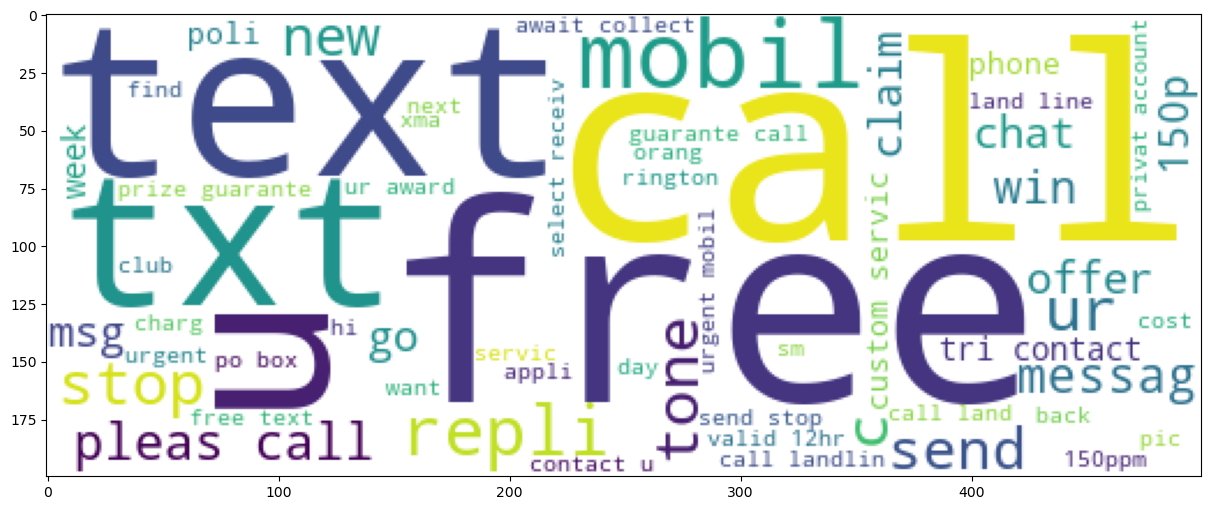

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [39]:
ham_wc = wc.generate(" ".join(data[data['Target']==0]['transformed_text']))

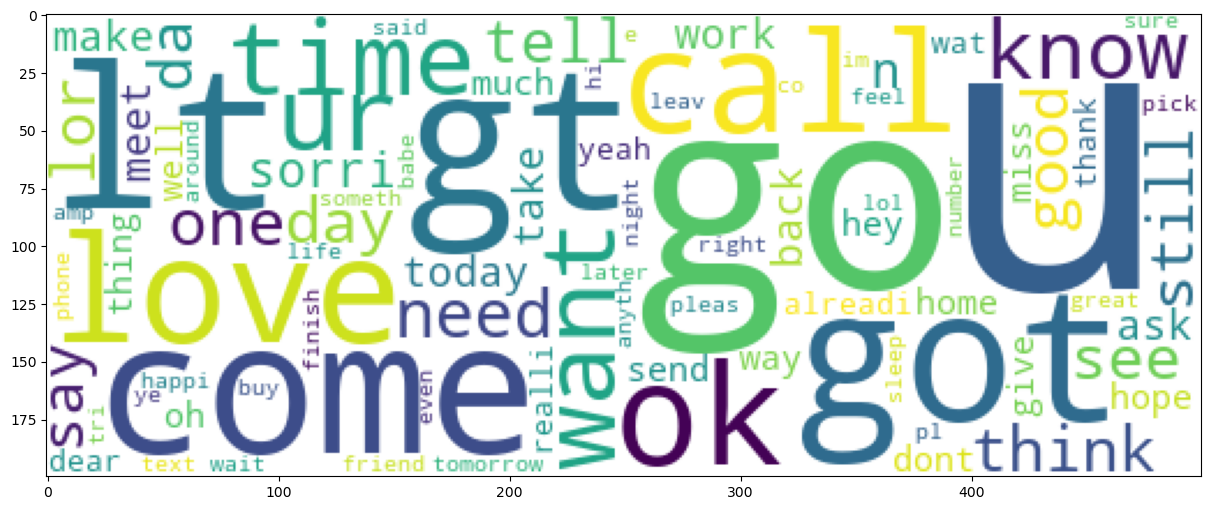

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [41]:
data.head()

,Target,Text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
spam_corpus = []
for msg in data[data['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

### Building The Model

In [44]:
from sklearn.feature_extraction.text import  CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [45]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [46]:
X.shape

(5169, 6708)

In [47]:
y = data['Target'].values

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB ,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [ ]:
#tfidf ... > MNB

In [56]:
! pip install Xgboost

     ---------------------------------------- 99.8/99.8 MB 2.0 MB/s eta 0:00:00


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [65]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc =  BaggingClassifier(n_estimators = 50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)


In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9465648854961832)

In [70]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For',name)
    print('Accuracy = ',current_accuracy)
    print('precision = ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy =  0.9729206963249516
precision =  0.9465648854961832
For KN
Accuracy =  0.8965183752417795
precision =  1.0
For NB
Accuracy =  0.9613152804642167
precision =  0.9906542056074766
For DT
Accuracy =  0.9352030947775629
precision =  0.8145161290322581
For LR
Accuracy =  0.9439071566731141
precision =  0.865546218487395
For RF
Accuracy =  0.9690522243713733
precision =  0.991304347826087


C:\Users\goyal\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy =  0.9477756286266924
precision =  0.8421052631578947
For BgC
Accuracy =  0.9613152804642167
precision =  0.8776978417266187
For ETC
Accuracy =  0.97678916827853
precision =  0.991869918699187
For GBDT
Accuracy =  0.9506769825918762
precision =  0.9519230769230769
For xgb
Accuracy =  0.9738878143133463
precision =  0.9682539682539683


In [72]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending = False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.976789,0.991870
5,RF,0.969052,0.991304
2,NB,0.961315,0.990654
10,xgb,0.973888,0.968254
9,GBDT,0.950677,0.951923
0,SVC,0.972921,0.946565
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
6,AdaBoost,0.947776,0.842105


In [74]:
performance_df1 = pd.melt(performance_df , id_vars = 'Algorithm')

In [75]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.976789
2,RF,Accuracy,0.969052
3,NB,Accuracy,0.961315
4,xgb,Accuracy,0.973888
5,GBDT,Accuracy,0.950677
6,SVC,Accuracy,0.972921
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.943907
9,AdaBoost,Accuracy,0.947776


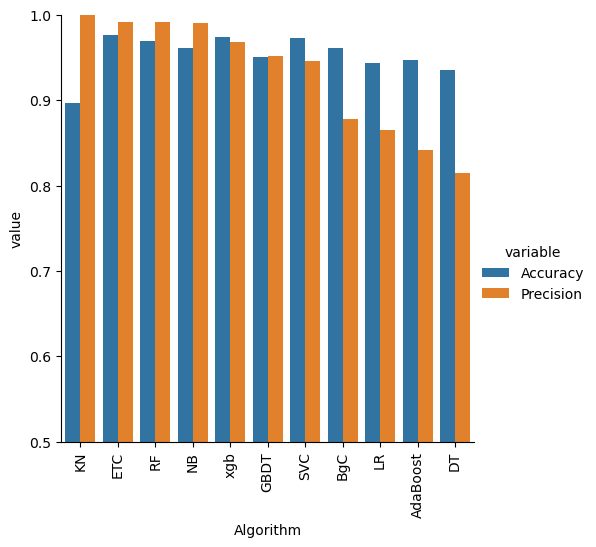

In [77]:
sns.catplot(x = 'Algorithm',y = 'value',
           hue='variable',data = performance_df1 , kind = 'bar' , height = 5 )
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

### Voting Classifier

In [79]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0,probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state = 2)

from sklearn.ensemble import VotingClassifier

In [81]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [82]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [86]:
y_pred = voting.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred))
print('Precision =', precision_score(y_test, y_pred))

Accuracy = 0.9825918762088974
Precision = 1.0
